In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open("names.txt","r").read().splitlines()
print(words)
print(len(words))

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton', 'ryle

In [3]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i , s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [49]:
X,Y = [],[]
n = 3
for w in words:
    #print(w)
    chars = "."*n + w + "." 
    for i in range(len(chars)-n):
        X.append([stoi[ix] for ix in chars[i:i+n]])
        Y.append(stoi[chars[i+n]])
        #print(f"{chars[i:i+n]} -> {chars[i+n]}")
X = torch.tensor(X)
Y = torch.tensor(Y)


In [ ]:
n1 = int(0.8 * len(words))
n2 = int(0.1 * len(words))
def build_dataset(words):
    X,Y = [],[]
    n = 3
    for w in words:
        #print(w)
        chars = "."*n + w + "." 
        for i in range(len(chars)-n):
            X.append([stoi[ix] for ix in chars[i:i+n]])
            Y.append(stoi[chars[i+n]])
            #print(f"{chars[i:i+n]} -> {chars[i+n]}")
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,Y.shape)
    return(X,Y)
import random
random.shuffle(words)
Xtr , Ytr = build_dataset(words[:n1])
Xdev , Ydev = build_dataset(words[n1:n1+n2])
Xtest , Ytest = build_dataset(words[n1+n2:])

In [50]:
X.shape , X.dtype, Y.shape , Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [95]:
g = torch.Generator().manual_seed(214748647)
C =  torch.randn((27,2),generator=g)
W1 = torch.randn((6,300),generator=g)
b1 = torch.randn(300,generator=g)
W2 = torch.randn((300,27),generator=g)
b2 = torch.randn((27),generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [96]:
C[X][0]

tensor([[-0.2489,  0.9382],
        [-0.2489,  0.9382],
        [-0.2489,  0.9382]], grad_fn=<SelectBackward0>)

In [72]:
a = torch.linspace(-3,0,1000)
lrs = 10 ** a
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [ ]:
lossi = []
lri = []
for i in range(1000):

    ix =  torch.randint(0,X.shape[0],(32,))    
    # forward pass
    emb = C[X][ix] # (32,3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # probs = counts / counts.sum(1,keepdim=True)
    # loss = -probs[torch.arange(32),Y].log().mean()
    loss = F.cross_entropy(logits,Y[ix])
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -lrs[i] * p.grad
    lri.append(a[i])
    lossi.append(loss.item())


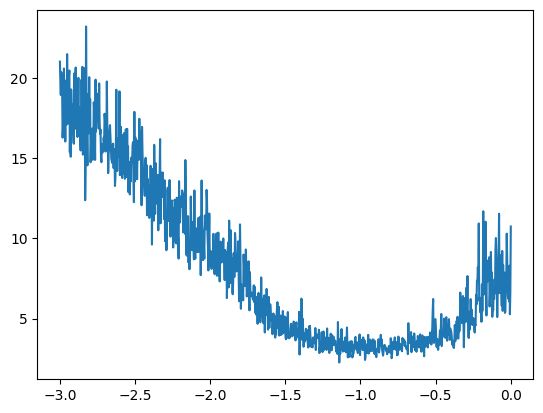

In [74]:
plt.plot(lri,lossi)

In [115]:
for i in range(2000):

    ix =  torch.randint(0,Xtr.shape[0],(64,))    
    # forward pass
    emb = C[Xtr][ix] # (32,3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # probs = counts / counts.sum(1,keepdim=True)
    # loss = -probs[torch.arange(32),Y].log().mean()
    loss = F.cross_entropy(logits,Ytr[ix])
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.007 * p.grad


2.4801204204559326
2.482705593109131
2.3409011363983154
2.2156283855438232
2.540167808532715
2.3606181144714355
2.6317265033721924
2.5383944511413574
2.5230841636657715
2.6523897647857666
2.416456460952759
2.5992305278778076
2.629538059234619
2.442073106765747
2.515385866165161
2.4282612800598145
2.4192020893096924
2.504302501678467
2.5334975719451904
2.5480306148529053
2.7409138679504395
2.481595993041992
2.514503002166748
2.2392687797546387
2.5869810581207275
2.4696297645568848
2.415372371673584
2.5676252841949463
2.4823310375213623
2.6458489894866943
2.5135178565979004
2.5311357975006104
2.329686403274536
2.5639259815216064
2.668602466583252
2.4004881381988525
2.49963641166687
2.405374765396118
2.629582643508911
2.4779231548309326
2.2388594150543213
2.321382999420166
2.308319330215454
2.6122324466705322
2.4288218021392822
2.547469139099121
2.554119348526001
2.5215060710906982
2.5115394592285156
2.4524261951446533
2.6009812355041504
2.467404365539551
2.5689291954040527
2.310306549072

In [116]:
emb = C[Xdev] # (32,3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
print(loss)

tensor(2.4935, grad_fn=<NllLossBackward0>)


In [117]:
emb = C[Xtr] # (32,3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ytr)
print(loss)

tensor(2.4845, grad_fn=<NllLossBackward0>)


In [122]:
for _ in range(20):    
    out = []
    context = [0]*3
    while True:
        emb = C[context]
        h = torch.tanh(emb.view(-1,6) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs,num_samples=1,replacement=True,generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if(ix == 0):
            break
    print("".join([itos[i] for i in out]))


zak.
leruren.
cry.
kiveaodnenordin.
hoko.
obh.
zpeinas.
cueywh.
harer.
mii.
siri.
evon.
walla.
ortaras.
tane.
sira.
alit.
fexvissirin.
men.
rke.
